In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.layers import GRU, Dense
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from PIL import Image
import os

C:\Users\Akshat\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
window_size=5
def create_windows(features, labels, window_size):
    windows = []
    num_samples = min(len(features), len(labels))  # Adjust to the minimum length of features and labels
    for i in range(num_samples - window_size + 1):
        windows.append(features[i:i+window_size])
    return windows, labels[:num_samples-window_size+1]

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

def plot_metrics(history, y_true, y_pred_proba):
    # Plot accuracy
    plt.figure(figsize=(18, 5))

    # Plot accuracy
    plt.subplot(1, 4, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss per epoch
    plt.subplot(1, 4, 2)
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.plot(np.arange(1, len(train_loss) + 1), train_loss, label='Train Loss')
    plt.plot(np.arange(1, len(val_loss) + 1), val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss per Epoch')
    plt.legend()

    # Calculate and print metrics
    accuracy = accuracy_score(y_true, y_pred_proba.round())
    precision = precision_score(y_true, y_pred_proba.round())
    recall = recall_score(y_true, y_pred_proba.round())
    f1 = f1_score(y_true, y_pred_proba.round())
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 score: ", f1)

    # Plot precision, recall, and F1 score
    plt.subplot(1, 4, 3)
    metrics_names = ['Precision', 'Recall', 'F1 Score']
    metrics = [precision, recall, f1]
    plt.bar(metrics_names, metrics)
    plt.title('Precision, Recall, and F1 Score')
    plt.ylabel('Score')

    # Plot ROC-AUC curve
    plt.subplot(1, 4, 4)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    plt.plot(fpr, tpr, label=f'ROC-AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve')
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()


## Showing Dataset

### CelebDF

#### Normal 

In [ ]:
dataset_dir = "../Data/Image_set2/Normal_images/train"

# Get the list of class directories in the dataset directory
class_dirs = [os.path.join(dataset_dir, class_dir) for class_dir in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, class_dir))]

# Plot the first 60 images from each class
for class_dir in class_dirs:
    # Get the list of image files in the class directory
    image_files = [os.path.join(class_dir, image_file) for image_file in os.listdir(class_dir) if image_file.endswith('.jpg')]

    # Plot the first 60 images from the class
    plt.figure(figsize=(10, 6))
    plt.suptitle(os.path.basename(class_dir))
    for i in range(min(len(image_files), 60)):
        plt.subplot(6, 10, i + 1)
        image = Image.open(image_files[i])
        plt.imshow(image)
        plt.axis('off')
    plt.show()

#### ELA

In [ ]:
dataset_dir = "../Data/Image_set2/ELA_images/train"

# Get the list of class directories in the dataset directory
class_dirs = [os.path.join(dataset_dir, class_dir) for class_dir in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, class_dir))]

# Plot the first 60 images from each class
for class_dir in class_dirs:
    # Get the list of image files in the class directory
    image_files = [os.path.join(class_dir, image_file) for image_file in os.listdir(class_dir) if image_file.endswith('.jpg')]

    # Plot the first 60 images from the class
    plt.figure(figsize=(10, 6))
    plt.suptitle(os.path.basename(class_dir))
    for i in range(min(len(image_files), 60)):
        plt.subplot(6, 10, i + 1)
        image = Image.open(image_files[i])
        plt.imshow(image)
        plt.axis('off')
    plt.show()

### FaceForensics++

### Normal

In [ ]:
dataset_dir = "../Data/sampled_Faces/Frames"

# Get the list of class directories in the dataset directory
class_dirs = [os.path.join(dataset_dir, class_dir) for class_dir in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, class_dir))]

# Plot the first 60 images from each class
for class_dir in class_dirs:
    # Get the list of image files in the class directory
    image_files = [os.path.join(class_dir, image_file) for image_file in os.listdir(class_dir) if image_file.endswith('.jpg')]

    # Plot the first 60 images from the class
    plt.figure(figsize=(10, 6))
    plt.suptitle(os.path.basename(class_dir))
    for i in range(min(len(image_files), 60)):
        plt.subplot(6, 10, i + 1)
        image = Image.open(image_files[i])
        plt.imshow(image)
        plt.axis('off')
    plt.show()

### ELA

In [ ]:
dataset_dir = "../Data/sampled_Faces/ELA_Frames"

# Get the list of class directories in the dataset directory
class_dirs = [os.path.join(dataset_dir, class_dir) for class_dir in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, class_dir))]

# Plot the first 60 images from each class
for class_dir in class_dirs:
    # Get the list of image files in the class directory
    image_files = [os.path.join(class_dir, image_file) for image_file in os.listdir(class_dir) if image_file.endswith('.jpg')]

    # Plot the first 60 images from the class
    plt.figure(figsize=(10, 6))
    plt.suptitle(os.path.basename(class_dir))
    for i in range(min(len(image_files), 60)):
        plt.subplot(6, 10, i + 1)
        image = Image.open(image_files[i])
        plt.imshow(image)
        plt.axis('off')
    plt.show()

## ViT + GRU

### Celeb DF 

In [ ]:
df1=pd.read_csv("../Data/files/files/Celeb-df_vit.csv")
df1.head()

In [ ]:
df1=df1.drop(columns=["Unnamed: 0"],axis=1)

In [ ]:
df1.head()

In [ ]:
df1.describe()

In [ ]:
X = df1.drop('Label', axis=1).values
y = df1['Label'].values

In [ ]:
X = X[:5*(len(X)//5)]
y=y[:5*(len(y)//5)]

In [ ]:
# Assuming you have X and y (features and labels) already defined
X_windows, y_windows = create_windows(X, y, window_size)
X_windows=np.array(X_windows)
y_windows=np.array(y_windows)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_windows, y_windows, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()

# Add a GRU layer
model.add(GRU(units=64, input_shape=(window_size, X_train.shape[2]))) 
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))


model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

In [ ]:
y_pred= model.predict(X_test)
plot_metrics(history, y_test, y_pred)

### FaceForensics++

In [ ]:
df=pd.read_csv("../Data/files/files/FaceForensics++_vit.csv")
df.head()

In [ ]:
df=df.drop(columns=["Unnamed: 0"],axis=1)

In [ ]:
df.head()

In [ ]:
X = df.drop('Label', axis=1).values
y = df['Label'].values

In [ ]:
X = X[:5*(len(X)//5)]
y=y[:5*(len(y)//5)]

In [ ]:
X_windows, y_windows = create_windows(X, y, window_size)
X_windows=np.array(X_windows)
y_windows=np.array(y_windows)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_windows, y_windows, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()

# Add a GRU layer
model.add(GRU(units=64, input_shape=(window_size, X_train.shape[2]))) 
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))


model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

In [ ]:
y_pred= model.predict(X_test)
plot_metrics(history, y_test, y_pred)

## ViT

### Celeb DF

In [ ]:
df1=pd.read_csv("../Data/files/files/Celeb-df_vit.csv")
df1.head()

In [ ]:
df1.head()

In [ ]:
df1.describe()

In [ ]:
X = df1.drop('Label', axis=1).values
y = df1['Label'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

In [ ]:
y_pred= model.predict(X_test)
plot_metrics(history, y_test, y_pred)

### FaceForensics++

In [ ]:
df=pd.read_csv("../Data/files/files/FaceForensics++_vit.csv")
df.head()

In [ ]:
df=df.drop(columns=["Unnamed: 0"],axis=1)

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
X = df.drop('Label', axis=1).values
y = df['Label'].values



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

In [ ]:
y_pred= model.predict(X_test)
plot_metrics(history, y_test, y_pred)

### LeViT



Epoch 1/50


605/605 [==============================] - 1s 2ms/step - loss: 0.5005 - accuracy: 0.7552 - val_loss: 0.3990 - val_accuracy: 0.8154
Epoch 2/50
605/605 [==============================] - 1s 1ms/step - loss: 0.3502 - accuracy: 0.8378 - val_loss: 0.3523 - val_accuracy: 0.8429
Epoch 3/50
605/605 [==============================] - 1s 1ms/step - loss: 0.2997 - accuracy: 0.8686 - val_loss: 0.3329 - val_accuracy: 0.8427
Epoch 4/50
605/605 [==============================] - 1s 1ms/step - loss: 0.2545 - accuracy: 0.8881 - val_loss: 0.2982 - val_accuracy: 0.8720
Epoch 5/50
605/605 [==============================] - 1s 1ms/step - loss: 0.2296 - accuracy: 0.8994 - val_loss: 0.3006 - val_accuracy: 0.8749
Epoch 6/50
605/605 [==============================] - 1s 1ms/step - loss: 0.2019 - accuracy: 0.9141 - val_loss: 0.2717 - val_accuracy: 0.8867
Epoch 7/50
605/605 [==============================] - 1s 1ms/step - loss: 0.1889 - accuracy: 0.9193 - val_loss: 0.2692 - val_accuracy: 0.8900
Ep

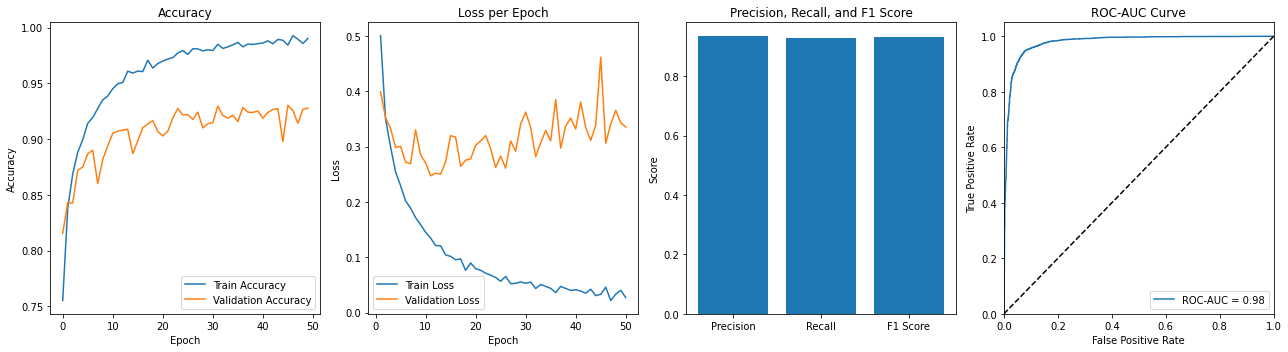

In [5]:
df1=pd.read_csv("../Data/files/files/celebdfLevit.csv")
df1.head()
df1=df1.drop(columns=["Unnamed: 0"],axis=1)
df1.head()
df1.describe()
X = df1.drop('label', axis=1).values
y = df1['label'].values
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='gelu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
y_pred= model.predict(X_test)
plot_metrics(history, y_test, y_pred)

Epoch 1/50
677/677 [==============================] - 1s 1ms/step - loss: 0.4229 - accuracy: 0.8088 - val_loss: 0.3079 - val_accuracy: 0.8747
Epoch 2/50
677/677 [==============================] - 1s 1ms/step - loss: 0.2398 - accuracy: 0.9069 - val_loss: 0.2605 - val_accuracy: 0.9002
Epoch 3/50
677/677 [==============================] - 1s 1ms/step - loss: 0.1942 - accuracy: 0.9236 - val_loss: 0.2286 - val_accuracy: 0.9074
Epoch 4/50
677/677 [==============================] - 1s 1ms/step - loss: 0.1664 - accuracy: 0.9357 - val_loss: 0.1942 - val_accuracy: 0.9266
Epoch 5/50
677/677 [==============================] - 1s 1ms/step - loss: 0.1472 - accuracy: 0.9417 - val_loss: 0.1876 - val_accuracy: 0.9324
Epoch 6/50
677/677 [==============================] - 1s 1ms/step - loss: 0.1325 - accuracy: 0.9469 - val_loss: 0.2044 - val_accuracy: 0.9178
Epoch 7/50
677/677 [==============================] - 1s 1ms/step - loss: 0.1160 - accuracy: 0.9546 - val_loss: 0.1852 - val_accuracy: 0.9313
Epoch 

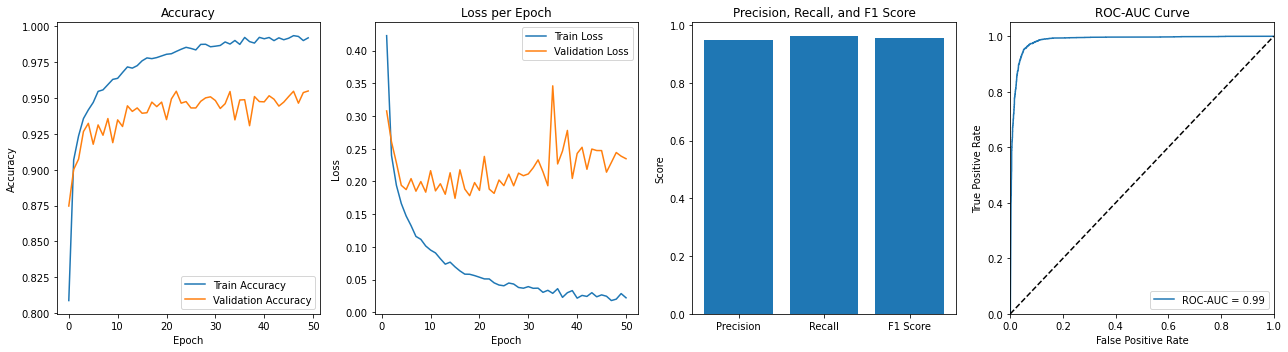

In [6]:
df1=pd.read_csv("../Data/files/files/fflevit.csv")
df1.head()
df1=df1.drop(columns=["Unnamed: 0"],axis=1)
df1.head()
df1.describe()
X = df1.drop('label', axis=1).values
y = df1['label'].values
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='gelu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
y_pred= model.predict(X_test)
plot_metrics(history, y_test, y_pred)

### MobileVit

Epoch 1/50
605/605 [==============================] - 1s 2ms/step - loss: 0.5064 - accuracy: 0.7432 - val_loss: 0.3937 - val_accuracy: 0.8146
Epoch 2/50
605/605 [==============================] - 1s 1ms/step - loss: 0.3539 - accuracy: 0.8403 - val_loss: 0.3462 - val_accuracy: 0.8452
Epoch 3/50
605/605 [==============================] - 1s 1ms/step - loss: 0.2838 - accuracy: 0.8742 - val_loss: 0.2826 - val_accuracy: 0.8780
Epoch 4/50
605/605 [==============================] - 1s 1ms/step - loss: 0.2371 - accuracy: 0.8972 - val_loss: 0.2985 - val_accuracy: 0.8830
Epoch 5/50
605/605 [==============================] - 1s 1ms/step - loss: 0.1999 - accuracy: 0.9151 - val_loss: 0.2486 - val_accuracy: 0.8991
Epoch 6/50
605/605 [==============================] - 1s 1ms/step - loss: 0.1758 - accuracy: 0.9261 - val_loss: 0.2424 - val_accuracy: 0.9051
Epoch 7/50
605/605 [==============================] - 1s 1ms/step - loss: 0.1551 - accuracy: 0.9376 - val_loss: 0.2528 - val_accuracy: 0.9049
Epoch 

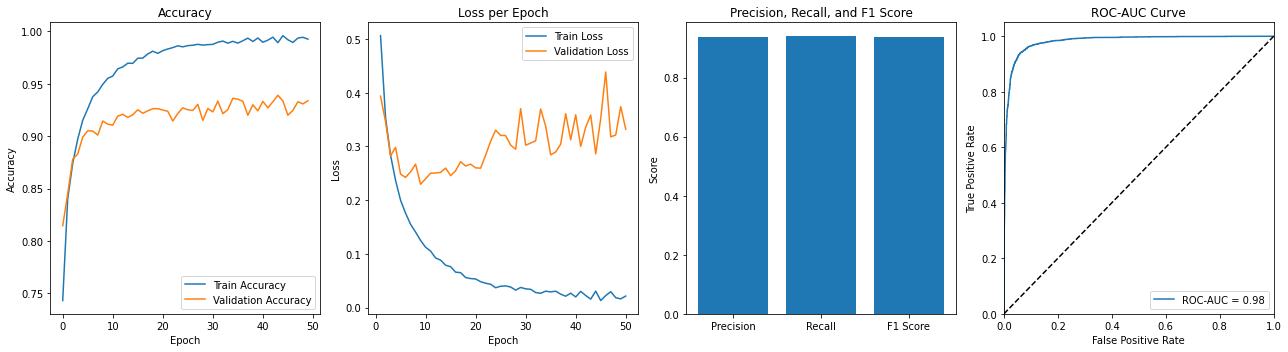

In [7]:
df1=pd.read_csv("../Data/files/files/celebdfmobilevit.csv")
df1.head()
df1=df1.drop(columns=["Unnamed: 0"],axis=1)
df1.head()
df1.describe()
X = df1.drop('label', axis=1).values
y = df1['label'].values
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='gelu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
y_pred= model.predict(X_test)
plot_metrics(history, y_test, y_pred)

In [ ]:
df1=pd.read_csv("../Data/files/files/FFmobilevit.csv")
df1.head()
df1=df1.drop(columns=["Unnamed: 0"],axis=1)
df1.head()
df1.describe()
X = df1.drop('label', axis=1).values
y = df1['label'].values
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='gelu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
y_pred= model.predict(X_test)
plot_metrics(history, y_test, y_pred)

Epoch 1/100
677/677 [==============================] - 1s 1ms/step - loss: 0.4815 - accuracy: 0.7655 - val_loss: 0.3547 - val_accuracy: 0.8516
Epoch 2/100
677/677 [==============================] - 1s 1ms/step - loss: 0.2813 - accuracy: 0.8874 - val_loss: 0.2580 - val_accuracy: 0.8943
Epoch 3/100
677/677 [==============================] - 1s 1ms/step - loss: 0.2139 - accuracy: 0.9156 - val_loss: 0.2191 - val_accuracy: 0.9143
Epoch 4/100
677/677 [==============================] - 1s 1ms/step - loss: 0.1707 - accuracy: 0.9342 - val_loss: 0.2364 - val_accuracy: 0.9148
Epoch 5/100
677/677 [==============================] - 1s 1ms/step - loss: 0.1490 - accuracy: 0.9405 - val_loss: 0.2230 - val_accuracy: 0.9163
Epoch 6/100
677/677 [==============================] - 1s 1ms/step - loss: 0.1266 - accuracy: 0.9499 - val_loss: 0.2178 - val_accuracy: 0.9189
Epoch 7/100
677/677 [==============================] - 1s 1ms/step - loss: 0.1139 - accuracy: 0.9555 - val_loss: 0.2171 - val_accuracy: 0.9211

### SwiftFormer

Epoch 1/50
605/605 [==============================] - 1s 1ms/step - loss: 0.6019 - accuracy: 0.6665 - val_loss: 0.5318 - val_accuracy: 0.7308
Epoch 2/50
605/605 [==============================] - 1s 1ms/step - loss: 0.4769 - accuracy: 0.7635 - val_loss: 0.4495 - val_accuracy: 0.7840
Epoch 3/50
605/605 [==============================] - 1s 1ms/step - loss: 0.4005 - accuracy: 0.8116 - val_loss: 0.4295 - val_accuracy: 0.7889
Epoch 4/50
605/605 [==============================] - 1s 1ms/step - loss: 0.3524 - accuracy: 0.8367 - val_loss: 0.3672 - val_accuracy: 0.8299
Epoch 5/50
605/605 [==============================] - 1s 1ms/step - loss: 0.3181 - accuracy: 0.8560 - val_loss: 0.3502 - val_accuracy: 0.8383
Epoch 6/50
605/605 [==============================] - 1s 1ms/step - loss: 0.2918 - accuracy: 0.8686 - val_loss: 0.3207 - val_accuracy: 0.8586
Epoch 7/50
605/605 [==============================] - 1s 1ms/step - loss: 0.2730 - accuracy: 0.8777 - val_loss: 0.3212 - val_accuracy: 0.8594
Epoch 

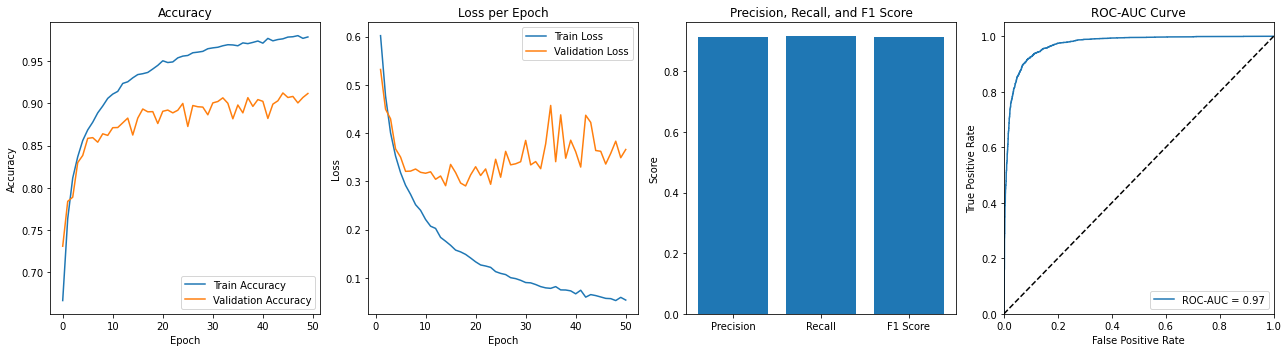

In [8]:
df1=pd.read_csv("../Data/celebdfswift.csv")
df1.head()
df1=df1.drop(columns=["Unnamed: 0"],axis=1)
df1.head()
df1.describe()
X = df1.drop('label', axis=1).values
y = df1['label'].values
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='gelu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
y_pred= model.predict(X_test)
plot_metrics(history, y_test, y_pred)

Epoch 1/50
677/677 [==============================] - 1s 2ms/step - loss: 0.5146 - accuracy: 0.7355 - val_loss: 0.3307 - val_accuracy: 0.8734
Epoch 2/50
677/677 [==============================] - 1s 1ms/step - loss: 0.2875 - accuracy: 0.8847 - val_loss: 0.2680 - val_accuracy: 0.9026
Epoch 3/50
677/677 [==============================] - 1s 1ms/step - loss: 0.2238 - accuracy: 0.9124 - val_loss: 0.2307 - val_accuracy: 0.9074
Epoch 4/50
677/677 [==============================] - 1s 1ms/step - loss: 0.1976 - accuracy: 0.9217 - val_loss: 0.2233 - val_accuracy: 0.9126
Epoch 5/50
677/677 [==============================] - 1s 1ms/step - loss: 0.1767 - accuracy: 0.9308 - val_loss: 0.2050 - val_accuracy: 0.9274
Epoch 6/50
677/677 [==============================] - 1s 1ms/step - loss: 0.1612 - accuracy: 0.9363 - val_loss: 0.2018 - val_accuracy: 0.9261
Epoch 7/50
677/677 [==============================] - 1s 1ms/step - loss: 0.1557 - accuracy: 0.9392 - val_loss: 0.1825 - val_accuracy: 0.9331
Epoch 

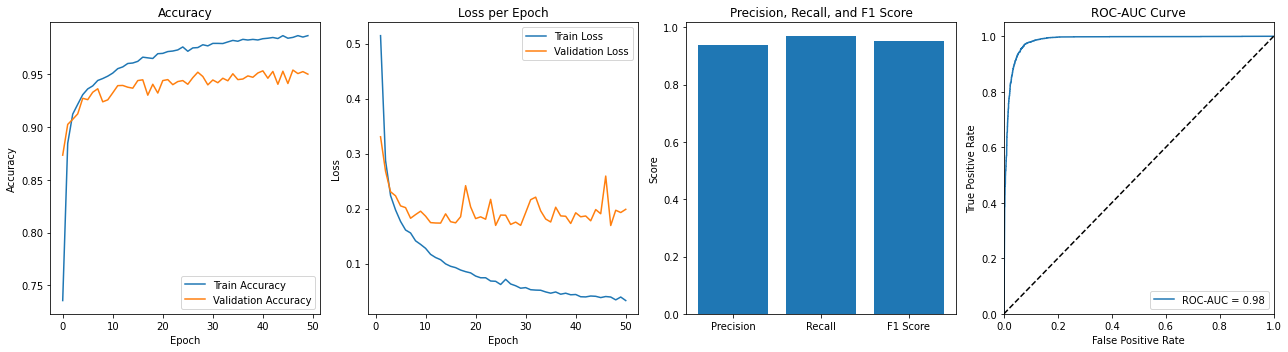

In [9]:
df1=pd.read_csv("../Data/ffswift.csv")
df1.head()
df1=df1.drop(columns=["Unnamed: 0"],axis=1)
df1.head()
df1.describe()
X = df1.drop('label', axis=1).values
y = df1['label'].values
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='gelu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
y_pred= model.predict(X_test)
plot_metrics(history, y_test, y_pred)

### Swin v2

Epoch 1/50
605/605 [==============================] - 1s 2ms/step - loss: 0.4800 - accuracy: 0.7547 - val_loss: 0.4240 - val_accuracy: 0.7914
Epoch 2/50
605/605 [==============================] - 1s 2ms/step - loss: 0.3325 - accuracy: 0.8481 - val_loss: 0.3583 - val_accuracy: 0.8441
Epoch 3/50
605/605 [==============================] - 1s 2ms/step - loss: 0.2750 - accuracy: 0.8759 - val_loss: 0.3005 - val_accuracy: 0.8636
Epoch 4/50
605/605 [==============================] - 1s 2ms/step - loss: 0.2377 - accuracy: 0.8947 - val_loss: 0.2650 - val_accuracy: 0.8828
Epoch 5/50
605/605 [==============================] - 1s 2ms/step - loss: 0.2145 - accuracy: 0.9040 - val_loss: 0.2562 - val_accuracy: 0.8890
Epoch 6/50
605/605 [==============================] - 1s 2ms/step - loss: 0.1840 - accuracy: 0.9192 - val_loss: 0.2447 - val_accuracy: 0.8913
Epoch 7/50
605/605 [==============================] - 1s 2ms/step - loss: 0.1674 - accuracy: 0.9289 - val_loss: 0.2502 - val_accuracy: 0.8975
Epoch 

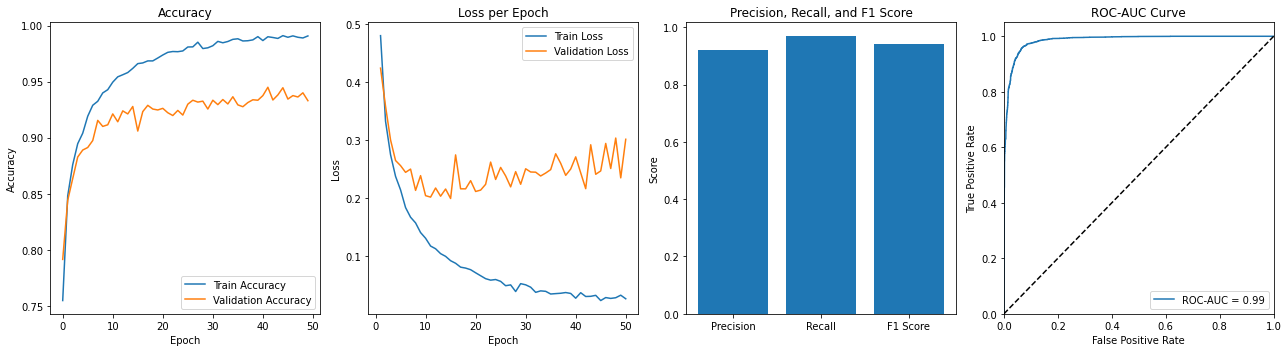

In [10]:
df1=pd.read_csv("../Data/files/files/celebdfswinv2.csv")
df1.head()
df1=df1.drop(columns=["Unnamed: 0"],axis=1)
df1.head()
df1.describe()
X = df1.drop('label', axis=1).values
y = df1['label'].values
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='gelu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
y_pred= model.predict(X_test)
plot_metrics(history, y_test, y_pred)

Epoch 1/50
677/677 [==============================] - 2s 2ms/step - loss: 0.3646 - accuracy: 0.8339 - val_loss: 0.2273 - val_accuracy: 0.9189
Epoch 2/50
677/677 [==============================] - 1s 2ms/step - loss: 0.2056 - accuracy: 0.9210 - val_loss: 0.1977 - val_accuracy: 0.9205
Epoch 3/50
677/677 [==============================] - 1s 2ms/step - loss: 0.1698 - accuracy: 0.9333 - val_loss: 0.1785 - val_accuracy: 0.9311
Epoch 4/50
677/677 [==============================] - 1s 2ms/step - loss: 0.1471 - accuracy: 0.9419 - val_loss: 0.1593 - val_accuracy: 0.9364
Epoch 5/50
677/677 [==============================] - 1s 2ms/step - loss: 0.1320 - accuracy: 0.9478 - val_loss: 0.1578 - val_accuracy: 0.9414
Epoch 6/50
677/677 [==============================] - 1s 2ms/step - loss: 0.1276 - accuracy: 0.9488 - val_loss: 0.1695 - val_accuracy: 0.9318
Epoch 7/50
677/677 [==============================] - 1s 2ms/step - loss: 0.1147 - accuracy: 0.9523 - val_loss: 0.1767 - val_accuracy: 0.9307
Epoch 

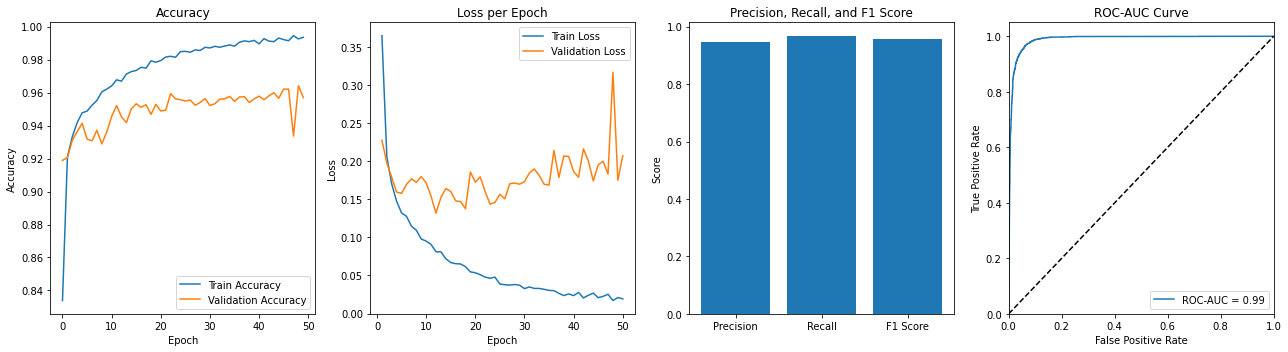

In [11]:
df1=pd.read_csv("../Data/files/files/ffswinv2.csv")
df1.head()
df1=df1.drop(columns=["Unnamed: 0"],axis=1)
df1.head()
df1.describe()
X = df1.drop('label', axis=1).values
y = df1['label'].values
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='gelu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
y_pred= model.predict(X_test)
plot_metrics(history, y_test, y_pred)

## ELA+ViT+GRU

### Celeb DF

In [ ]:
df1=pd.read_csv("../Data/celebdfELAEfficientFormer.csv")
df1.head()

In [ ]:
df1=df1.drop(columns=["Unnamed: 0"],axis=1)

In [ ]:
df1.head()

In [ ]:
df1.describe()

In [ ]:
X = df1.drop('label', axis=1).values
y = df1['label'].values

In [ ]:
X = X[:5*(len(X)//5)]
y=y[:5*(len(y)//5)]

In [ ]:
X_windows, y_windows = create_windows(X, y, window_size)
X_windows=np.array(X_windows)
y_windows=np.array(y_windows)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_windows, y_windows, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

In [ ]:
model = Sequential()

# Add a GRU layer
model.add(GRU(units=64, input_shape=(window_size, X_train.shape[2]),return_sequences=True)) 
model.add(GRU(units=64, return_sequences=False))  


model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

In [ ]:
y_pred= model.predict(X_test)
plot_metrics(history, y_test, y_pred)

In [ ]:
y_preds=[]
for i in y_pred:
    if i>0.5:
        y_preds.append(1)
    else:
        y_preds.append(0)

In [ ]:
print(classification_report(y_test, y_preds))


In [ ]:
cm=confusion_matrix(y_test,y_preds)
print(cm)

### FaceForensics++

In [ ]:
df=pd.read_csv("../Data/ffELAEfficientFormer.csv")
df.head()

In [ ]:
df=df.drop(columns=["Unnamed: 0"],axis=1)

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
X = df.drop('label', axis=1).values
y = df['label'].values


In [ ]:
X = X[:5*(len(X)//5)]
y=y[:5*(len(y)//5)]

In [ ]:
# Assuming you have X and y (features and labels) already defined
X_windows, y_windows = create_windows(X, y, window_size)
X_windows=np.array(X_windows)
y_windows=np.array(y_windows)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_windows, y_windows, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()

# Add a GRU layer
model.add(GRU(units=64, input_shape=(window_size, X_train.shape[2]),return_sequences=True)) 
model.add(GRU(units=64, return_sequences=False))  


model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

In [ ]:
y_pred= model.predict(X_test)
plot_metrics(history, y_test, y_pred)

In [ ]:
y_preds=[]
for i in y_pred:
    if i>0.5:
        y_preds.append(1)
    else:
        y_preds.append(0)

In [ ]:
print(classification_report(y_test, y_preds))

In [ ]:
cm=confusion_matrix(y_test,y_preds)
print(cm)